# 1 - Perkenalan

Nama : golda

Batch : FTDS-018-RMT

Dataset : `churn.csv`

Objective : Saya ingin membuat model untuk memprediksi apakah konsumen yang perusahaan punya itu akan pergi atau tidak. kali ini saya akan menggunakan model ANN untuk mengetahui prediksinya dengan menitikberatkan pada nilai akurasi.

Hugginface : `https://huggingface.co/spaces/golda/Churn_pred`

# 2 - Install library and Import Libraries

men-install library yang tidak disediakan

In [3]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.4/319.4 KB 6.3 MB/s eta 0:00:00


memasukkan semua library yang diperlukan selama proses `deep learning`

In [5]:
# Import Libraries

import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.impute import SimpleImputer

from feature_engine.outliers import Winsorizer
from tensorflow.keras import Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, concatenate, Dense

import pickle
import json





In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3 - Data Loading

mengambil data churn yang diperlukan dari `github`.

In [8]:
# Data Loading

data = pd.read_csv('https://raw.githubusercontent.com/H8-Assignments-Bay/p2---ftds-018-rmt---m1-GoldaLearnthings/main/churn.csv?token=GHSAT0AAAAAAB57VGEQ36PRDZELSB3HHTUSZBGOYQA')

melihat 5 data teratas

In [ ]:
data.head(5)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


melihat 5 data terbawah.

In [ ]:
data.tail(5)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37010.0,37.120697,15.866834,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,37010.0,-41.943502,228.875324,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,37010.0,279.201356,330.017336,0.00,60.1225,161.770,356.5250,3235.578521
avg_transaction_value,37010.0,29272.430216,19445.963492,800.46,14177.8350,27554.485,40858.6725,99914.050000
avg_frequency_login_days,37010.0,14.659540,9.478756,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,37010.0,623.590885,270.218956,0.00,574.2200,680.400,756.9900,2069.069761
churn_risk_score,37010.0,0.540881,0.498333,0.00,0.0000,1.000,1.0000,1.000000


In [ ]:
data.corr()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
age,1.000000,-0.003922,0.000746,-0.000333,-0.001738,-0.001002,0.006233
days_since_last_login,-0.003922,1.000000,0.000058,0.004043,-0.000678,-0.000014,-0.006015
avg_time_spent,0.000746,0.000058,1.000000,0.023113,-0.001355,-0.001239,-0.013396
avg_transaction_value,-0.000333,0.004043,0.023113,1.000000,-0.116690,0.056447,-0.217906
avg_frequency_login_days,-0.001738,-0.000678,-0.001355,-0.116690,1.000000,-0.025818,0.113436
points_in_wallet,-0.001002,-0.000014,-0.001239,0.056447,-0.025818,1.000000,-0.200284
churn_risk_score,0.006233,-0.006015,-0.013396,-0.217906,0.113436,-0.200284,1.000000


# 4 - Exploratory Data Analysis (EDA)

## informasi datasheet sederhana

melihat informasi sederhana pada dataset diatas.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [5]:
data['internet_option'].value_counts()

Wi-Fi          12417
Mobile_Data    12346
Fiber_Optic    12247
Name: internet_option, dtype: int64

Diketahui dari informasi di atas terdapat 22 kolom dengan 37010 baris data di dalam dataframe

melihat data yang hilang pada dataset diatas.

In [ ]:
data.isnull().mean()

user_id                         0.000000
age                             0.000000
gender                          0.001594
region_category                 0.146744
membership_category             0.000000
joining_date                    0.000000
joined_through_referral         0.147041
preferred_offer_types           0.007782
medium_of_operation             0.145771
internet_option                 0.000000
last_visit_time                 0.000000
days_since_last_login           0.000000
avg_time_spent                  0.000000
avg_transaction_value           0.000000
avg_frequency_login_days        0.000000
points_in_wallet                0.000000
used_special_discount           0.000000
offer_application_preference    0.000000
past_complaint                  0.000000
complaint_status                0.000000
feedback                        0.000000
churn_risk_score                0.000000
dtype: float64

Diketahui dari informasi di atas terdapat 5 kolom dengan persentase 0,15% sampai 14.6% data yang hilang di dalam dataframe

melihat data yang duplikat pada dataset diatas.

In [ ]:
data.duplicated().sum()

18

Diketahui dari informasi di atas terdapat 18 baris data duplikat di dalam dataframe

## melihat pierchart data churn pada dataset diatas

In [ ]:
data['churn_risk_score'].value_counts()

1    20018
0    16992
Name: churn_risk_score, dtype: int64

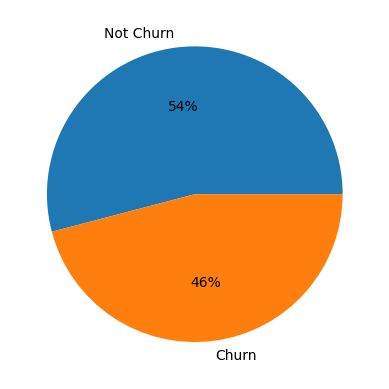

In [ ]:
plt.pie(data['churn_risk_score'].value_counts(), labels=['Not Churn', 'Churn'], autopct='%.0f%%')
plt.show() 

dari piechart data diatas, dapat dilihat bahwa terdapat 46% atau sebesar 16992 konsumen yang berhenti memakai produk yang ditawarkan, dan 54% atau sebesar 20018 masih memakai produk yang ditawarkan.  

## melihat korelasi antar feature terhadap features `churn`

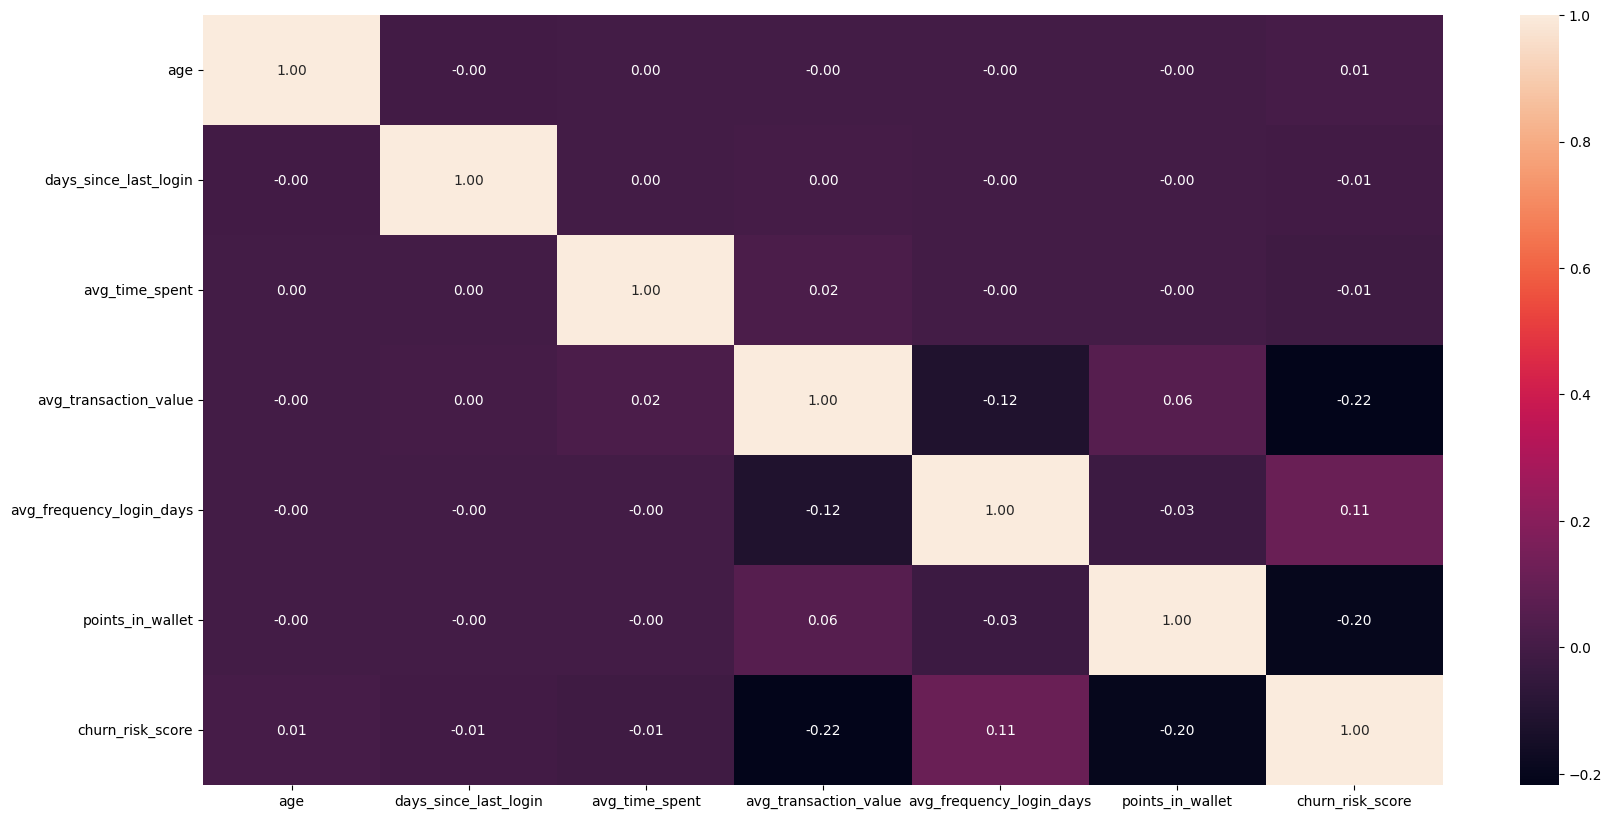

In [ ]:
# Membuat visualisasi korelasi hubungan fitur terhadap target dengan heatmap()

plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

dari data korelasi yang ditampilkan diatas, didapati bahwa features `age, days_since_last_login, avg_time_spent` tidak memiliki pengaruh yang berarti pada data `churn` di setiap konsumen. 

## melihat *crosstable* setiap `features` bila disandingkan dengan nilai nilai `churn`

dengen melihat perbandingan perhitungan tiap `features` pada data kategori, maka hasil persebaran datanya dibandingkan dengan persentase data `churn`. Bila ia setiap features memiliki perbedaan yang kurang lebih dari 8%, maka dapat diasumsikan bahwa data tersebut tidak memiliki korelasi pada data `churn`.

#### gender

Text(0.5, 1.0, 'gender')

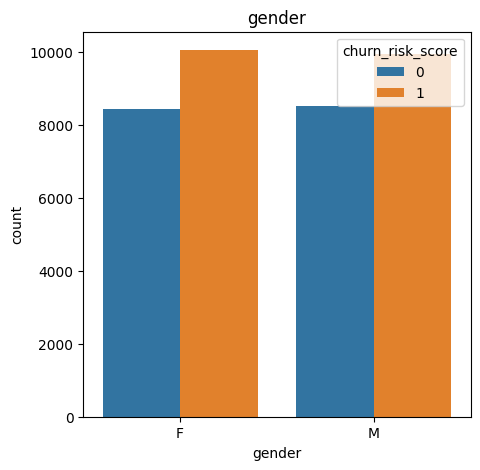

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='gender',hue= 'churn_risk_score', data=data)
plt.title('gender')

In [ ]:
pd.crosstab(data['gender'],data['churn_risk_score'])


churn_risk_score,0,1
gender,,
F,8446,10051
M,8516,9938


dari nilai crosstab pada features `gender` terhadap nilai `churn`, dapat diasumsikan bahwa features tersebut tidak memiliki korelasi yang cukup signifikan terhadap nilai `churn`. 

#### region_category

Text(0.5, 1.0, 'region_category')

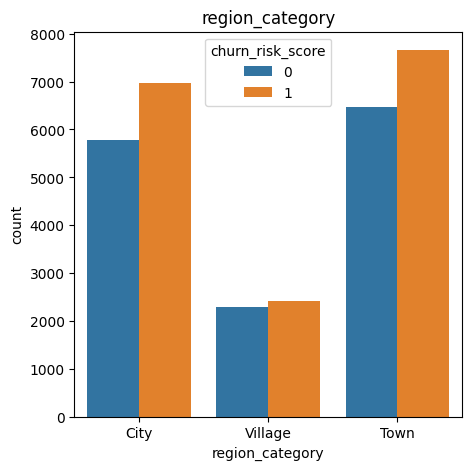

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='region_category',hue= 'churn_risk_score', data=data)
plt.title('region_category')

In [ ]:
pd.crosstab(data['region_category'],data['churn_risk_score'])


churn_risk_score,0,1
region_category,,
City,5773,6971
Town,6474,7661
Village,2293,2407


dari nilai crosstab pada features `region_category` terhadap nilai `churn`, dapat diasumsikan bahwa features tersebut memiliki korelasi yang cukup signifikan terhadap nilai `churn`. 

#### membership_category

Text(0.5, 1.0, 'membership_category')

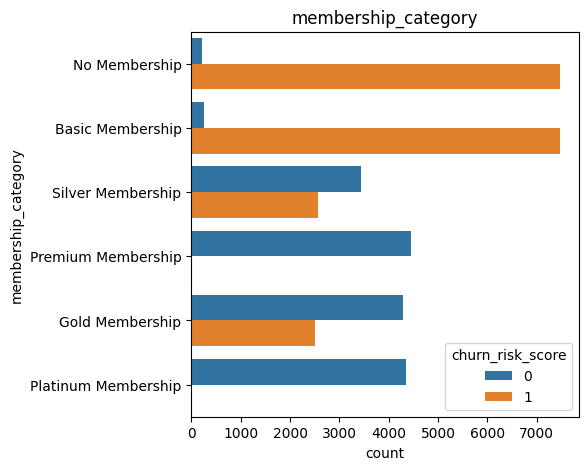

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(y='membership_category',hue= 'churn_risk_score', data=data)
plt.title('membership_category')

In [ ]:
pd.crosstab(data['membership_category'],data['churn_risk_score'])


churn_risk_score,0,1
membership_category,,
Basic Membership,251,7476
Gold Membership,4285,2514
No Membership,226,7467
Platinum Membership,4342,0
Premium Membership,4458,0
Silver Membership,3430,2561


dari nilai crosstab pada features `membership_category` terhadap nilai `churn`, dapat diasumsikan bahwa features tersebut memiliki korelasi yang cukup signifikan terhadap nilai `churn`. 

#### joined_through_referral

Text(0.5, 1.0, 'joined_through_referral')

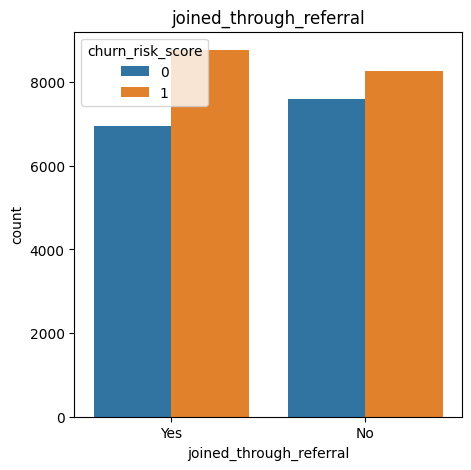

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='joined_through_referral',hue= 'churn_risk_score', data=data)
plt.title('joined_through_referral')

In [ ]:
pd.crosstab(data['joined_through_referral'],data['churn_risk_score'])


churn_risk_score,0,1
joined_through_referral,,
No,7581,8265
Yes,6956,8766


dari nilai crosstab pada features `joined_through_referral` terhadap nilai `churn`, dapat diasumsikan bahwa features tersebut memiliki korelasi yang cukup signifikan terhadap nilai `churn`. 

#### preferred_offer_types

Text(0.5, 1.0, 'preferred_offer_types')

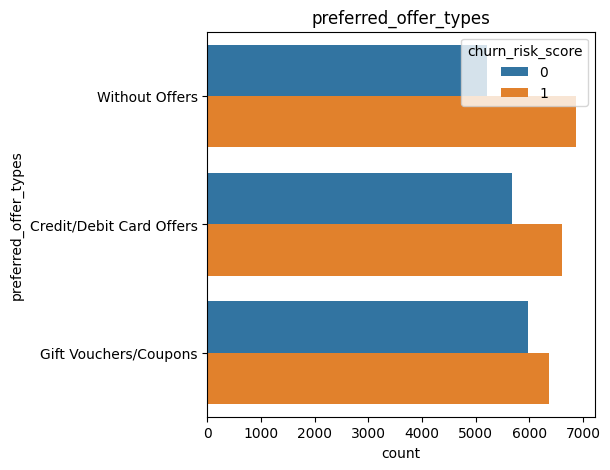

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(y='preferred_offer_types',hue= 'churn_risk_score', data=data)
plt.title('preferred_offer_types')

In [ ]:
pd.crosstab(data['preferred_offer_types'],data['churn_risk_score'])


churn_risk_score,0,1
preferred_offer_types,,
Credit/Debit Card Offers,5670,6611
Gift Vouchers/Coupons,5985,6372
Without Offers,5206,6878


dari nilai crosstab pada features `preferred_offer_types` terhadap nilai `churn`, dapat diasumsikan bahwa features tersebut memiliki korelasi yang cukup signifikan terhadap nilai `churn`. 

#### medium_of_operation

Text(0.5, 1.0, 'medium_of_operation')

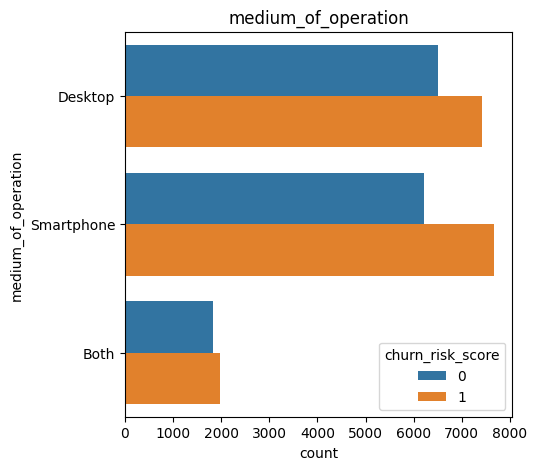

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(y='medium_of_operation',hue= 'churn_risk_score', data=data)
plt.title('medium_of_operation')

In [ ]:
pd.crosstab(data['medium_of_operation'],data['churn_risk_score'])


churn_risk_score,0,1
medium_of_operation,,
Both,1830,1983
Desktop,6499,7418
Smartphone,6218,7667


dari nilai crosstab pada features `medium_of_operation` terhadap nilai `churn`, dapat diasumsikan bahwa features tersebut memiliki korelasi yang cukup signifikan terhadap nilai `churn`. 

#### used_special_discount

Text(0.5, 1.0, 'used_special_discount')

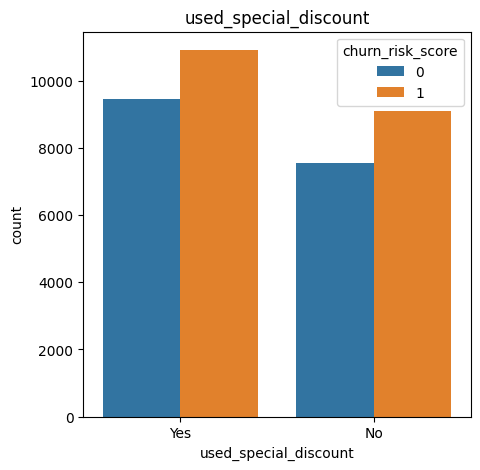

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='used_special_discount',hue= 'churn_risk_score', data=data)
plt.title('used_special_discount')

In [ ]:
pd.crosstab(data['used_special_discount'],data['churn_risk_score'])


churn_risk_score,0,1
used_special_discount,,
No,7551,9106
Yes,9441,10912


dari nilai crosstab pada features `used_special_discount` terhadap nilai `churn`, dapat diasumsikan bahwa features tersebut tidak memiliki korelasi yang cukup signifikan terhadap nilai `churn`. 

#### offer_application_preference

Text(0.5, 1.0, 'offer_application_preference')

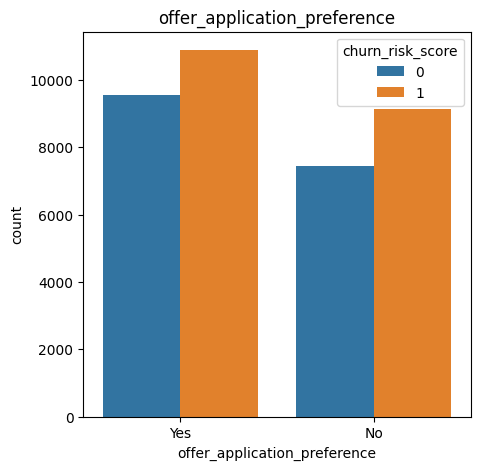

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='offer_application_preference',hue= 'churn_risk_score', data=data)
plt.title('offer_application_preference')

In [ ]:
pd.crosstab(data['offer_application_preference'],data['churn_risk_score'])


churn_risk_score,0,1
offer_application_preference,,
No,7431,9130
Yes,9561,10888


dari nilai crosstab pada features `offer_application_preference` terhadap nilai `churn`, dapat diasumsikan bahwa features tersebut memiliki korelasi yang cukup signifikan terhadap nilai `churn`. 

#### past_complaint

Text(0.5, 1.0, 'past_complaint')

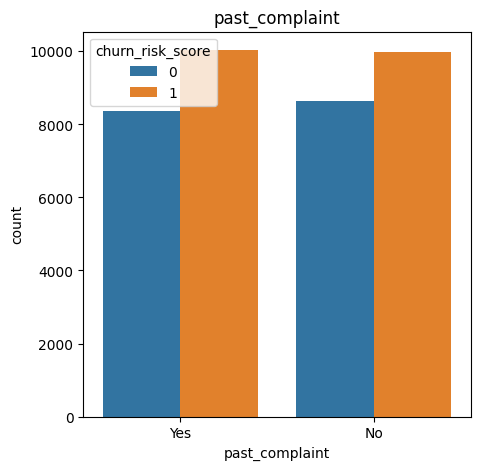

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='past_complaint',hue= 'churn_risk_score', data=data)
plt.title('past_complaint')

In [ ]:
pd.crosstab(data['past_complaint'],data['churn_risk_score'])


churn_risk_score,0,1
past_complaint,,
No,8628,9983
Yes,8364,10035


dari nilai crosstab pada features `past_complaint` terhadap nilai `churn`, dapat diasumsikan bahwa features tersebut tidak memiliki korelasi yang cukup signifikan terhadap nilai `churn`. 

#### feedback

Text(0.5, 1.0, 'feedback')

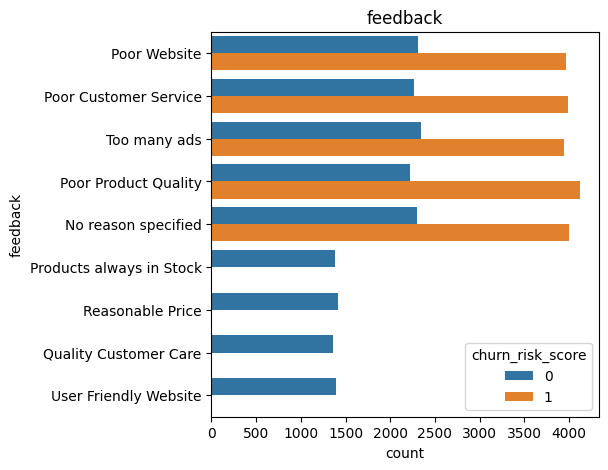

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(y='feedback',hue= 'churn_risk_score', data=data)
plt.title('feedback')

In [ ]:
pd.crosstab(data['feedback'],data['churn_risk_score'])


churn_risk_score,0,1
feedback,,
No reason specified,2300,3995
Poor Customer Service,2262,3993
Poor Product Quality,2226,4127
Poor Website,2309,3964
Products always in Stock,1382,0
Quality Customer Care,1360,0
Reasonable Price,1417,0
Too many ads,2343,3939
User Friendly Website,1393,0


dari nilai crosstab pada features `feedback` terhadap nilai `churn`, dapat diasumsikan bahwa features tersebut memiliki korelasi yang cukup signifikan terhadap nilai `churn`. 

## melihat persebaran data numerik

Text(0.5, 1.0, 'Histogram points_in_wallet')

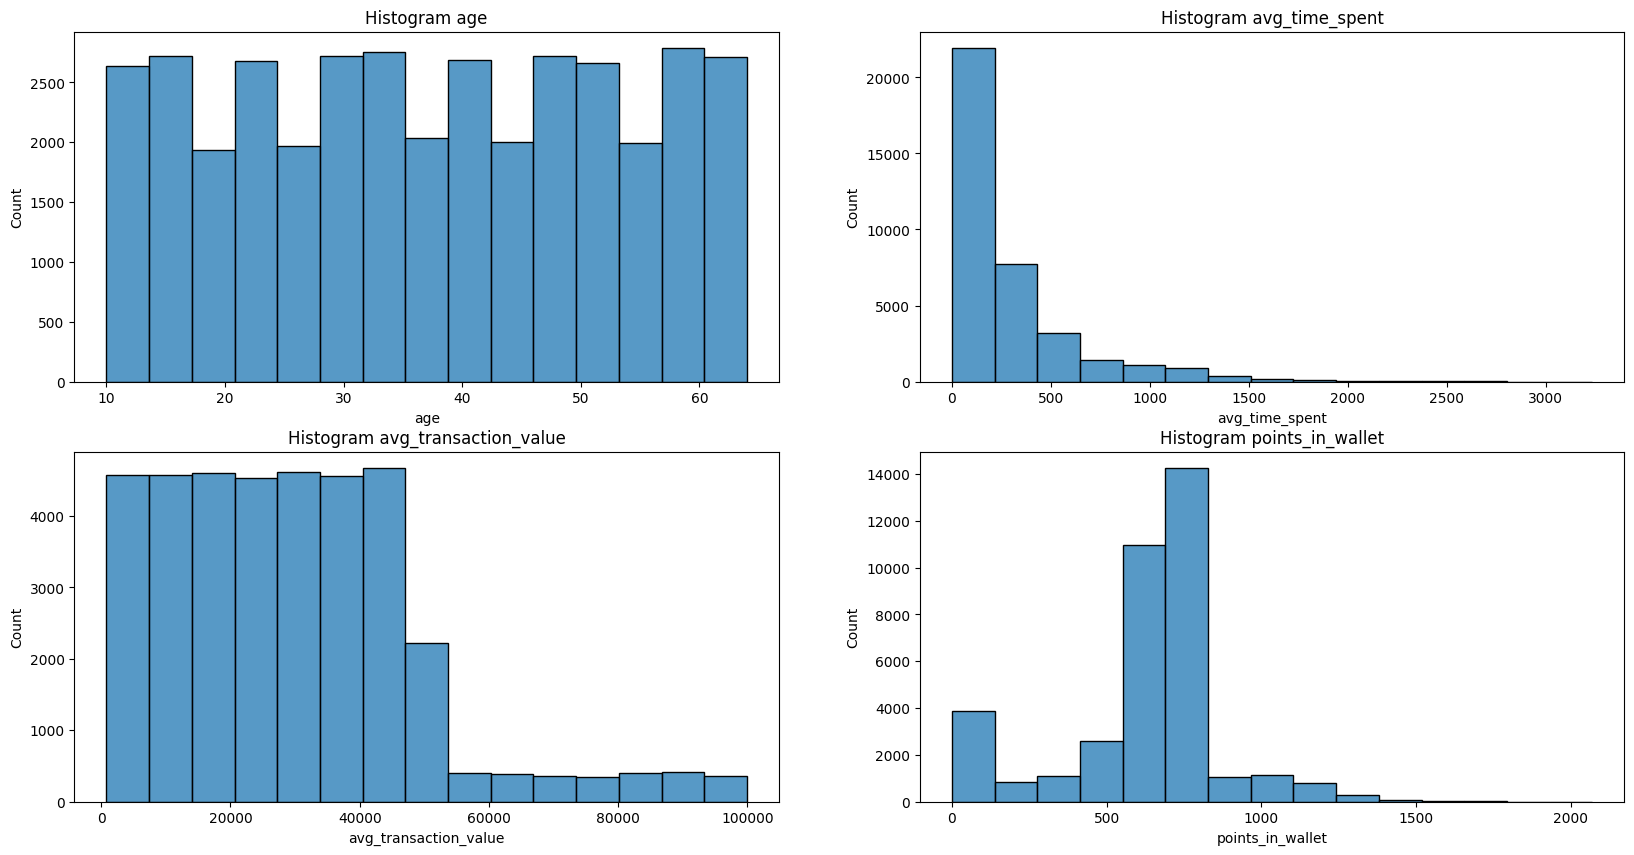

In [ ]:
# Membuat visualisasi sebaran data pada kelompok kolom `age, avg_time_spent, avg_transaction_value, points_in_wallet`
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
sns.histplot(data['age'], bins=15)
plt.title('Histogram age')

plt.subplot(2, 2, 2)
sns.histplot(data['avg_time_spent'], bins=15)
plt.title('Histogram avg_time_spent')

plt.subplot(2, 2, 3)
sns.histplot(data['avg_transaction_value'], bins=15)
plt.title('Histogram avg_transaction_value')

plt.subplot(2, 2, 4)
sns.histplot(data['points_in_wallet'], bins=15)
plt.title('Histogram points_in_wallet')


dengan melihat histogram pada data numerik, dapat dilihat bahwa umur setiap pelanggan berkisaran dari `10` sampai `64` tahun. rata-rata waktu yang diperlukan pelanggan sewaktu menjelajah website kita berkisar antara `0` sampai `3235` menit dengan modus di `0-200` menit. rata-rata jumlah transaksi pada setiap pelanggan berkisar antara `$800` sampai `$99914`. dan market point yang dihasilkan oleh pelanggan berkisar antara `0` sampai `2069` poin dengan modus di `700-800` poin.

## melihat nilai dengan kardinalitas tinggi pada data kategori


melihat nilai yang dimiliki oleh tiap kolom data kategorikal.

In [ ]:
# Cardinality check

print('Number of categories in the variable gender   : {}'.format(len(data.gender.unique())))
print('Number of categories in the variable region   : {}'.format(len(data.region_category.unique())))
print('Number of categories in the variable membership   : {}'.format(len(data.membership_category.unique())))
print('Number of categories in the variable join referral   : {}'.format(len(data.joined_through_referral.unique())))
print('Number of categories in the variable offer types   : {}'.format(len(data.preferred_offer_types.unique())))
print('Number of categories in the variable medium ops   : {}'.format(len(data.medium_of_operation.unique())))
print('Number of categories in the variable internet option   : {}'.format(len(data.internet_option.unique())))
print('Number of categories in the variable last visit  : {}'.format(len(data.last_visit_time.unique())))
print('Number of categories in the variable special disc   : {}'.format(len(data.used_special_discount.unique())))
print('Number of categories in the variable app offer  : {}'.format(len(data.offer_application_preference.unique())))
print('Number of categories in the variable past complaint   : {}'.format(len(data.past_complaint.unique())))
print('Number of categories in the variable complaint status : {}'.format(len(data.complaint_status.unique())))
print('Number of categories in the variable feedback  : {}'.format(len(data.feedback.unique())))
print('Total number of Customers    : {}'.format(len(data)))

Number of categories in the variable gender   : 3
Number of categories in the variable region   : 4
Number of categories in the variable membership   : 6
Number of categories in the variable join referral   : 3
Number of categories in the variable offer types   : 4
Number of categories in the variable medium ops   : 4
Number of categories in the variable internet option   : 3
Number of categories in the variable last visit  : 30101
Number of categories in the variable special disc   : 2
Number of categories in the variable app offer  : 2
Number of categories in the variable past complaint   : 2
Number of categories in the variable complaint status : 5
Number of categories in the variable feedback  : 9
Total number of Customers    : 37010


telihat bahwa data yang memiliki kardinalitas tinggi ialah data `last_visit_time` dengan nilai lebih dari `30000` nilai yang unik.

# 5 - Feature Engineering

In [9]:
df = data.copy()

men-duplikat dataset supaya datanya tidak rusak selama kegiatan berlangsung

## delete duplicate data

disini saya melakukan penghilangan data yang terduplikat pada dataset diatas

In [10]:
df_dupli_clean = df.loc[~(df.duplicated())]

In [11]:
df_dupli_clean.duplicated().sum()

0

## handling missing value 


memastikan tidak ada missing value pada dataset



In [12]:
df.isnull().mean()

user_id                         0.000000
age                             0.000000
gender                          0.001594
region_category                 0.146744
membership_category             0.000000
joining_date                    0.000000
joined_through_referral         0.147041
preferred_offer_types           0.007782
medium_of_operation             0.145771
internet_option                 0.000000
last_visit_time                 0.000000
days_since_last_login           0.000000
avg_time_spent                  0.000000
avg_transaction_value           0.000000
avg_frequency_login_days        0.000000
points_in_wallet                0.000000
used_special_discount           0.000000
offer_application_preference    0.000000
past_complaint                  0.000000
complaint_status                0.000000
feedback                        0.000000
churn_risk_score                0.000000
dtype: float64

terlihat dalam dataset diatas terdapat beberapa data kategori yang hilang. hal ini akan saya coba lakukan imputasi dengan nilai yang sering muncul.

In [13]:
imp_mode = SimpleImputer(strategy='most_frequent')
imp_mode.fit(df_dupli_clean)
imputed_df = imp_mode.transform(df_dupli_clean)

In [14]:
# create dataframe and name its columns into their originals name
df_imp = pd.DataFrame(imputed_df, columns=df_dupli_clean.columns)

# change into his original type
df_imp[['age', 'days_since_last_login', 'churn_risk_score']] = df[['age', 'days_since_last_login', 'churn_risk_score']].astype(np.int64)
df_imp[['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']] = df[['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']].astype(np.float64)

In [15]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       36992 non-null  object 
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   region_category               36992 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   preferred_offer_types         36992 non-null  object 
 8   medium_of_operation           36992 non-null  object 
 9   internet_option               36992 non-null  object 
 10  last_visit_time               36992 non-null  object 
 11  days_since_last_login         36992 non-null  int64  
 12  avg_time_spent                36992 non-null  float64
 13  a

setelah dilakukan imputasi dengan libraty `SimpleImputer` maka tidak ditemukan data yang kosong. perlu diingat, bahwa ketika kita melakukan imputasi, maka data tersebut sudah tidak original. sehingga akan menjadikan bias pada data yang kita punya.

## drop features

disini, saya akan mencoba menghilangkan data yang memiliki kardinalitas tinggi serta nilai korelasi yang tidak signifikan bila dibandingkan dengan kolom `churn`

In [ ]:
df_drop = df_imp.loc[:, ~df_imp.columns.isin(['user_id', 'joining_date', 'last_visit_time', 'age', 'days_since_last_login', 'avg_time_spent', 'gender', 'used_special_discount', 'past_complaint'])]

In [ ]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   region_category               36992 non-null  object 
 1   membership_category           36992 non-null  object 
 2   joined_through_referral       36992 non-null  object 
 3   preferred_offer_types         36992 non-null  object 
 4   medium_of_operation           36992 non-null  object 
 5   internet_option               36992 non-null  object 
 6   avg_transaction_value         36992 non-null  float64
 7   avg_frequency_login_days      36992 non-null  float64
 8   points_in_wallet              36992 non-null  float64
 9   offer_application_preference  36992 non-null  object 
 10  complaint_status              36992 non-null  object 
 11  feedback                      36992 non-null  object 
 12  churn_risk_score              36992 non-null  int64  
dtypes

disini, saya melakukan penghilangan data pada beberapa kolom, yaitu `'user_id', 'joining_date', 'last_visit_time', 'age', 'days_since_last_login', 'avg_time_spent', 'gender', 'used_special_discount', 'past_complaint'`. hal ini saya lakukan karena saya berasumsi bahwa data tersebut memiliki kardinalitas yang tinggi dan tidak terlalu berpengaruh pada data `churn` karena memiliki korelasi yang rendah.

## splitting train val test


In [ ]:
# Split between Train-Set, Val-Set, and Test-Set

train, test_val = train_test_split(df_drop, test_size=0.3, random_state=2)
test, val = train_test_split(test_val, test_size=0.5, random_state=2)

print('Train Size : ', train.shape)
print('val Size  : ', val.shape)
print('Test Size  : ', test.shape)

Train Size :  (25894, 13)
val Size  :  (5549, 13)
Test Size  :  (5549, 13)


Melakukan split terhadap data train dan data validation dan data test, dengan komposisi 70% untuk data train, 15% untuk data validation dan 15% sisanya untuk data test.

## outlier

disini saya akan melakukan perlakuan khusus pada data yang saya anggap tidak tersebar normal pada dataset latihan.

In [ ]:
train.skew()

<ipython-input-234-1d3a3c99b9d6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


avg_transaction_value       1.008238
avg_frequency_login_days    0.384370
points_in_wallet           -0.766016
churn_risk_score           -0.171175
dtype: float64

pada dataset diatas, saya berasumsi bahwa untuk persebaran data normal berada pada nilai kemiringan lebih besar dari -0,5 sampai lebih kecil dari 0,5. bila kemiringan data berada diantara -1 sampai -0,5 dan 0,5 sampai 1, maka persebaran data tersebut saya anggap tidak normal persebarannya. dan apabila kemiringan data kurang dari -1 dan lebih dari 1, maka saya anggap data tersebut memiliki persebaran yang ekstrim tidak normal. data yang memiliki persebaran yang tidak normal maupun yang ekstrim tidak normal, nantinya akan saya lakukan pengkondisian data.

#### data ekstrim tidak normal persebarannya

pada data yang ekstrim tersebut, akan saya lakukan imputasi pada data yang berada diatas maupun dibawah outlier yang telah ditentukan dengan nilai 3 kali dari nilai IQR.

In [ ]:
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=3, 
                        variables=['avg_transaction_value'])

winsorizer.fit(train)

Winsorizer(capping_method='iqr', tail='both',
           variables=['avg_transaction_value'])

In [ ]:
# Malakukan transformasi menggunakan winsorizer untuk nilai ekstrem tersebut pada X_skew

train = winsorizer.transform(train)

#### data tidak normal persebarannya

pada data yang tidak normal tersebut, akan saya lakukan imputasi pada data yang berada diatas maupun dibawah outlier yang telah ditentukan dengan nilai 1,5 kali dari nilai IQR.

In [ ]:
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, 
                        variables=['points_in_wallet'])

winsorizer.fit(train)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['points_in_wallet'])

In [ ]:
# Malakukan transformasi menggunakan winsorizer untuk nilai ekstrem tersebut pada X_skew

train = winsorizer.transform(train)

#### pengecekan data setelah di standarisasikan persebarannya.

In [ ]:
train.skew()

<ipython-input-240-1d3a3c99b9d6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


avg_transaction_value       1.008238
avg_frequency_login_days    0.384370
points_in_wallet           -0.341848
churn_risk_score           -0.171175
dtype: float64

data yang telah saya lakukan pengkondisian, terlihat persebarannya menjadi sedikit lebih baik. namun perlu diingat, bahwa pengkondisian data akan berujung pada data yang tidak original sehingga menimbulkan bias.

## Splitting between `X` and `y`

In [ ]:
# Splitting between `X` and `y`

X_train = train.drop(['churn_risk_score'], axis=1)
X_val = val.drop(['churn_risk_score'], axis=1)
X_test = test.drop(['churn_risk_score'], axis=1)

y_train = train['churn_risk_score']
y_val = val['churn_risk_score']
y_test = test['churn_risk_score']

data `churn_risk_score` akan saya jadikan `output`, dan sisanya akan saya jadikan sebagai `input` nya

## numerical and cat

disini, saya akan mengelompokkan data mana saja yang termasuk data numerik dan data kategorikal. data numerik nantinya akan saya pecah kembali menjadi 2, yaitu data numerik yang memiliki persebaran normal dan data numerik yang memiliki persebaran tidak normal.

In [ ]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Categorical Columns :  ['region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'offer_application_preference', 'complaint_status', 'feedback']


In [ ]:
num_skew = ['avg_transaction_value']
num_norm = ['avg_frequency_login_days', 'points_in_wallet']

dari data diatas, terlihat bahwa data kategorikal diantaranya ialah `'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'offer_application_preference', 'complaint_status', 'feedback'`.

dan data numerik yang memiliki persebaran data normal ialah `'avg_frequency_login_days', 'points_in_wallet'` dan data numerik yang memiliki persebaran data yang tidak normal ialah `avg_transaction_value`

## pipeline

In [ ]:
# Create A Pipeline

num_norm_pipeline = make_pipeline(StandardScaler())

num_skew_pipeline = make_pipeline(MinMaxScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num_norm', num_norm_pipeline, num_norm),
    ('pipe_skew_norm', num_skew_pipeline, num_skew),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [ ]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)

In [ ]:
X_train.shape

(25894, 39)

disini saya membuat transformer untuk proses pipelining. transform disini berisikan tentang metode scaling dan encoding. pada metode scaling, data dibagi menjadi 2, yaitu data numerik yang memiliki persebaran data yang normal dan data numerik yang memilik persebaran daya yang miring. pada data numerik yang memiliki persebaran normal, dilakukan dengan menggunakan metode `StandardScaller`. untuk data numerik lainnya akan digunakan metode `MinMaxScaller`. pada data kategorikal, dilakukan encode dengan metode `OneHotEncoder`. ketiga data tersebut yang telah di *scale* dan di *encode* digabungkan. terlihat bahwa data latihan memiliki 39 kolom sekarang.

## ETL

In [ ]:
# Create a training Dataset pipelines, slice and shuffle train dataset.

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=1024, seed=25).batch(128)

# Get validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(128)

# Get a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(128)

disini, saya membuat pipeline tensorflow dengan membagi data menjadi 128 tiap batch nya pada semua dataset. pada dataset train, saya beri buffer_size 1024 guna diacaknya setiap 1024 baris data.

# 6 - Model Definition

disini saya menggunakan 2 buah model yang berbeda, yaitu ANN model sequential dan ANN model functional. pada dasarnya, ANN (Artificial Neural Network) adalah model machine learning yang meniru cara kerja neuron pada mahkluk hidup, sehingga dalam melakukan prediksi atau klarifikasi serangkaian neuron buatan itu saling terhubung satu dengan lainnya.

Model sequential itu digunakan dengan cara membuat model dengan bentuk seperti neuron yang bekerja secara berurutan. output yang dihasilkan selalu hasil dari layer sebelumnya yang dijadikan sebagai input. sehingga model bekerja dengan berdasarkan sekuensi yang diberikan dari awal sampai akhir.

Model functional itu digunakan dengan cara membuat model dengan bentuk yang kita inginkan. setiap layer kita deklerasikan akan pergi kemana dahulu sehingga dalam pelatihan modelnya sangat fleksibel. membangun model functional perlu membutuhkan waktu yang relatif lebih lama dikarenakan kita sendiri yang menentukan arah layer tersebut.

# 7 - Model Training

## Sequential API

### test 1

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(64, activation='relu', input_shape=(39,))) # Hidden Layer 1
model_sequential.add(Dense(32, activation='relu')) # Hidden Layer 2
model_sequential.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2560      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


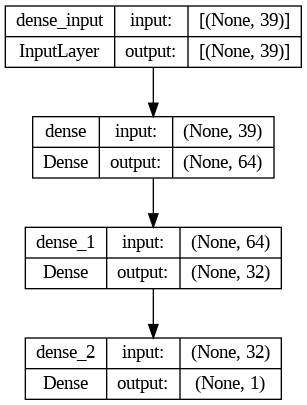

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

In [ ]:
# Train the Model

%%time
history_seq = model_sequential.fit(train_dataset,
                                   epochs=40,
                                   validation_data= val_dataset)

Epoch 1/40
203/203 [==============================] - 3s 6ms/step - loss: 0.6257 - accuracy: 0.7040 - val_loss: 0.5854 - val_accuracy: 0.7672
Epoch 2/40
203/203 [==============================] - 1s 6ms/step - loss: 0.5040 - accuracy: 0.7913 - val_loss: 0.4399 - val_accuracy: 0.7938
Epoch 3/40
203/203 [==============================] - 1s 4ms/step - loss: 0.3852 - accuracy: 0.8227 - val_loss: 0.4222 - val_accuracy: 0.7967
Epoch 4/40
203/203 [==============================] - 1s 3ms/step - loss: 0.3587 - accuracy: 0.8269 - val_loss: 0.3801 - val_accuracy: 0.8146
Epoch 5/40
203/203 [==============================] - 1s 3ms/step - loss: 0.3480 - accuracy: 0.8291 - val_loss: 0.3706 - val_accuracy: 0.8084
Epoch 6/40
203/203 [==============================] - 1s 4ms/step - loss: 0.3414 - accuracy: 0.8279 - val_loss: 0.3565 - val_accuracy: 0.8214
Epoch 7/40
203/203 [==============================] - 1s 4ms/step - loss: 0.3373 - accuracy: 0.8315 - val_loss: 0.3566 - val_accuracy: 0.8247
Epoch 

In [ ]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)

<Axes: >

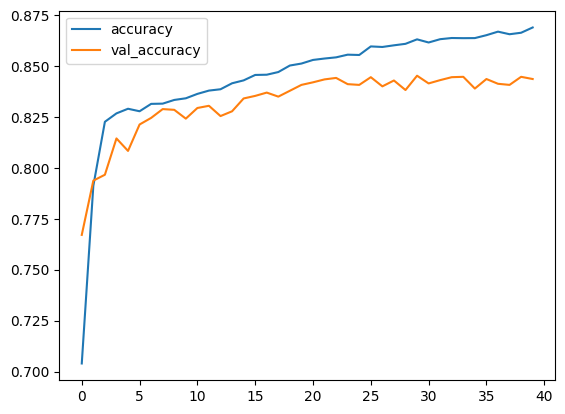

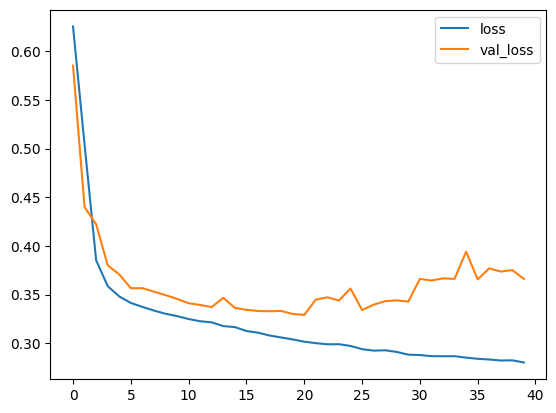

In [ ]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

dari model sequential diatas, saya memberikan 2 *hidden layer* dengan masing masing kedalaman `64` dan `32` serta activation dengan `relu` di kedua *hidden layer*-nya. output-nya saya berikan kedalaman `1` dengan activation `sigmoid`, hal ini saya lakukan karena saya ingin membuat klasifikasi. pada saat *compile*, saya menggunakan `loss = binary_crossentropy`, `optimizer= adam`, dan `metrics=['accuracy']`. dengan pengulangan (epoch) sebanyak 40 kali, didapatkan model dengan hasil yang kurang sempurna. hal ini terlihat karena pada grafik *history accuracy and loss* masih tergolong overfit.

### test 2


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_sequential_2 = Sequential()
model_sequential_2.add(Dense(64, activation='relu', input_shape=(39,))) # Hidden Layer 1
model_sequential_2.add(Dense(32, activation='relu')) # Hidden Layer 2
model_sequential_2.add(Dense(16, activation='relu')) # Hidden Layer 3
model_sequential_2.add(Dense(8, activation='relu')) # Hidden Layer 4
model_sequential_2.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential_2.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

model_sequential_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2560      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5,313
Trainable params: 5,313
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model

%%time
history_seq_2 = model_sequential_2.fit(train_dataset,
                                   epochs=40,
                                   validation_data=val_dataset)

Epoch 1/40
203/203 [==============================] - 4s 8ms/step - loss: 0.5673 - accuracy: 0.7389 - val_loss: 0.4547 - val_accuracy: 0.7949
Epoch 2/40
203/203 [==============================] - 1s 4ms/step - loss: 0.3755 - accuracy: 0.8199 - val_loss: 0.3558 - val_accuracy: 0.8061
Epoch 3/40
203/203 [==============================] - 1s 4ms/step - loss: 0.3397 - accuracy: 0.8271 - val_loss: 0.3513 - val_accuracy: 0.8113
Epoch 4/40
203/203 [==============================] - 1s 4ms/step - loss: 0.3312 - accuracy: 0.8320 - val_loss: 0.3381 - val_accuracy: 0.8192
Epoch 5/40
203/203 [==============================] - 1s 4ms/step - loss: 0.3255 - accuracy: 0.8368 - val_loss: 0.3283 - val_accuracy: 0.8324
Epoch 6/40
203/203 [==============================] - 1s 4ms/step - loss: 0.3212 - accuracy: 0.8427 - val_loss: 0.3352 - val_accuracy: 0.8335
Epoch 7/40
203/203 [==============================] - 1s 4ms/step - loss: 0.3191 - accuracy: 0.8413 - val_loss: 0.3390 - val_accuracy: 0.8295
Epoch 

In [ ]:
# Create DataFrame

history_seq_df_2 = pd.DataFrame(history_seq_2.history)

<Axes: >

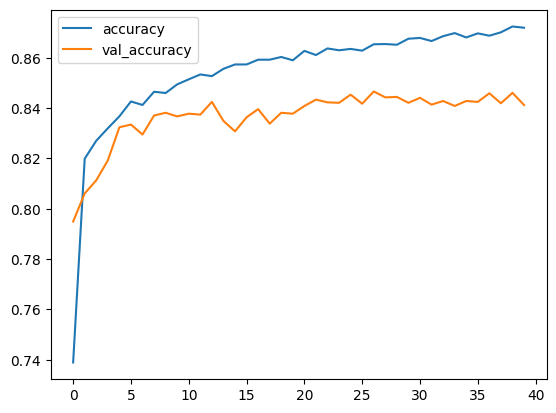

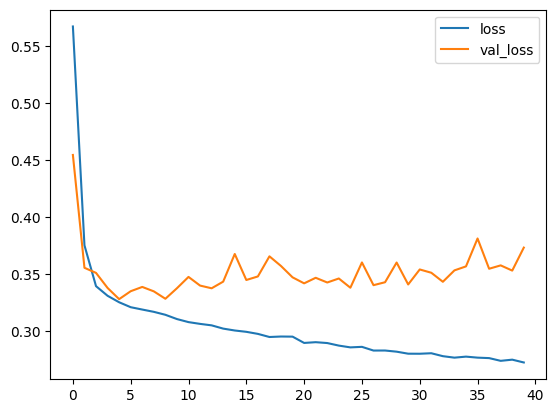

In [ ]:
# Plot Training Results

history_seq_df_2[['accuracy', 'val_accuracy']].plot()
history_seq_df_2[['loss', 'val_loss']].plot()

dari model sequential diatas, saya memberikan 4 *hidden layer* dengan masing masing kedalaman `64`, `32`, `16` dan `8` serta activation dengan `relu` di tiap *hidden layer*-nya. output-nya saya berikan kedalaman `1` dengan activation `sigmoid`, hal ini saya lakukan karena saya ingin membuat klasifikasi. pada saat *compile*, saya menggunakan `loss = binary_crossentropy`, `optimizer= adam`, dan `metrics=['accuracy']`. dengan pengulangan (epoch) sebanyak 40 kali, didapatkan model dengan hasil yang kurang sempurna. hal ini terlihat karena pada grafik *history accuracy and loss* masih tergolong overfit.

### test 3

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_sequential_3 = Sequential()
model_sequential_3.add(Dense(16, activation='selu', input_shape=(39,))) # Hidden Layer 1
model_sequential_3.add(Dense(8, activation='relu')) # Hidden Layer 2
model_sequential_3.add(Dense(4, activation='selu')) # Hidden Layer 3
model_sequential_3.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential_3.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

model_sequential_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                640       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model

%%time
history_seq_3 = model_sequential_3.fit(train_dataset,
                                   epochs=40,
                                   validation_data=val_dataset)

Epoch 1/40
203/203 [==============================] - 3s 4ms/step - loss: 0.6357 - accuracy: 0.6704 - val_loss: 0.6067 - val_accuracy: 0.7738
Epoch 2/40
203/203 [==============================] - 1s 3ms/step - loss: 0.5610 - accuracy: 0.8022 - val_loss: 0.5481 - val_accuracy: 0.8079
Epoch 3/40
203/203 [==============================] - 1s 4ms/step - loss: 0.5160 - accuracy: 0.8161 - val_loss: 0.4989 - val_accuracy: 0.8144
Epoch 4/40
203/203 [==============================] - 1s 4ms/step - loss: 0.4643 - accuracy: 0.8210 - val_loss: 0.4267 - val_accuracy: 0.8111
Epoch 5/40
203/203 [==============================] - 1s 3ms/step - loss: 0.3860 - accuracy: 0.8235 - val_loss: 0.3805 - val_accuracy: 0.8138
Epoch 6/40
203/203 [==============================] - 1s 3ms/step - loss: 0.3545 - accuracy: 0.8226 - val_loss: 0.3668 - val_accuracy: 0.8124
Epoch 7/40
203/203 [==============================] - 1s 3ms/step - loss: 0.3459 - accuracy: 0.8234 - val_loss: 0.3567 - val_accuracy: 0.8138
Epoch 

In [ ]:
# Create DataFrame

history_seq_df_3 = pd.DataFrame(history_seq_3.history)

<Axes: >

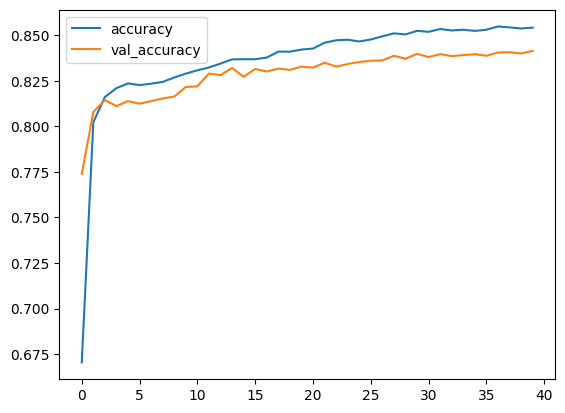

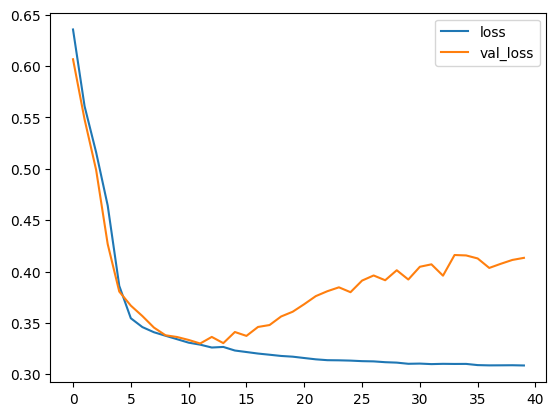

In [ ]:
# Plot Training Results

history_seq_df_3[['accuracy', 'val_accuracy']].plot()
history_seq_df_3[['loss', 'val_loss']].plot()

dari model sequential diatas, saya memberikan 3 *hidden layer* dengan masing masing kedalaman `16`, `8` dan `4` serta activation dengan masing-masing `selu`,`relu` dan `selu` di tiap *hidden layer*-nya. output-nya saya berikan kedalaman `1` dengan activation `sigmoid`, hal ini saya lakukan karena saya ingin membuat klasifikasi. pada saat *compile*, saya menggunakan `loss = binary_crossentropy`, `optimizer= adam`, dan `metrics=['accuracy']`. dengan pengulangan (epoch) sebanyak 40 kali, didapatkan model dengan hasil yang kurang sempurna. hal ini terlihat karena pada grafik *history accuracy and loss* masih tergolong overfit.

### test 4

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_sequential_4 = Sequential()
model_sequential_4.add(Dense(32, activation='relu', input_shape=(39,))) # Hidden Layer 1
model_sequential_4.add(Dense(16, activation='relu')) # Hidden Layer 2
model_sequential_4.add(Dense(8, activation='relu')) # Hidden Layer 3
model_sequential_4.add(Dense(4, activation='relu')) # Hidden Layer 4
model_sequential_4.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential_4.compile(loss='binary_crossentropy',
                         optimizer='adamax',
                         metrics=['accuracy'])

model_sequential_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1280      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model

%%time
history_seq_4 = model_sequential_4.fit(train_dataset,
                                   epochs=40,
                                   validation_data=val_dataset)

Epoch 1/40
203/203 [==============================] - 3s 6ms/step - loss: 0.6813 - accuracy: 0.6067 - val_loss: 0.6668 - val_accuracy: 0.6617
Epoch 2/40
203/203 [==============================] - 1s 5ms/step - loss: 0.6423 - accuracy: 0.7170 - val_loss: 0.6253 - val_accuracy: 0.7518
Epoch 3/40
203/203 [==============================] - 1s 5ms/step - loss: 0.6027 - accuracy: 0.7772 - val_loss: 0.5875 - val_accuracy: 0.7866
Epoch 4/40
203/203 [==============================] - 1s 4ms/step - loss: 0.5622 - accuracy: 0.7996 - val_loss: 0.5379 - val_accuracy: 0.7996
Epoch 5/40
203/203 [==============================] - 1s 4ms/step - loss: 0.5127 - accuracy: 0.8122 - val_loss: 0.4879 - val_accuracy: 0.8092
Epoch 6/40
203/203 [==============================] - 1s 4ms/step - loss: 0.4705 - accuracy: 0.8196 - val_loss: 0.4557 - val_accuracy: 0.8153
Epoch 7/40
203/203 [==============================] - 1s 3ms/step - loss: 0.4448 - accuracy: 0.8248 - val_loss: 0.4371 - val_accuracy: 0.8183
Epoch 

In [ ]:
# Create DataFrame

history_seq_df_4 = pd.DataFrame(history_seq_4.history)

<Axes: >

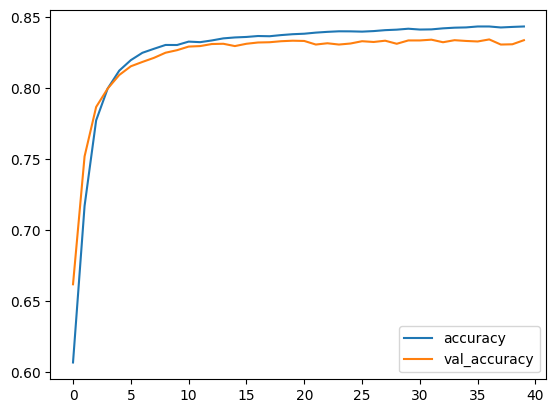

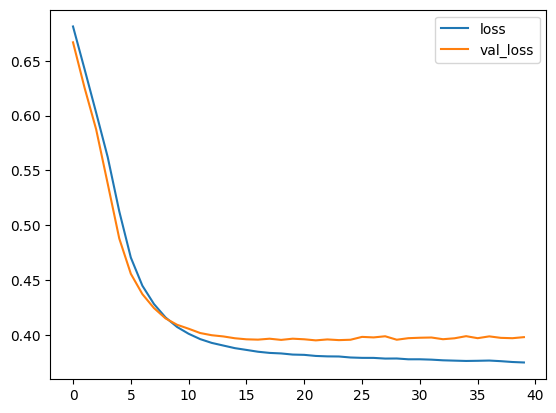

In [ ]:
# Plot Training Results

history_seq_df_4[['accuracy', 'val_accuracy']].plot()
history_seq_df_4[['loss', 'val_loss']].plot()

dari model sequential diatas, saya memberikan 4 *hidden layer* dengan masing masing kedalaman `32`, `16`, `8`, dan `4` serta activation dengan `relu` di kedua *hidden layer*-nya. output-nya saya berikan kedalaman `1` dengan activation `sigmoid`, hal ini saya lakukan karena saya ingin membuat klasifikasi. pada saat *compile*, saya menggunakan `loss = binary_crossentropy`, `optimizer= adamax`, dan `metrics=['accuracy']`. dengan pengulangan (epoch) sebanyak 40 kali, didapatkan model dengan hasil yang kurang sempurna. hal ini terlihat karena pada grafik *history accuracy and loss* sudah tergolong baik tetapi hasil `loss` dan `val loss` nya masih tergolong tinggi.

### test 5, best on sequential API

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_sequential_5 = Sequential()
model_sequential_5.add(Dense(8, activation='selu', input_shape=(39,))) # Hidden Layer 1
model_sequential_5.add(Dense(4, activation='selu')) # Hidden Layer 2
model_sequential_5.add(Dense(2, activation='selu')) # Hidden Layer 2
model_sequential_5.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential_5.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

model_sequential_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 320       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model

%%time
history_seq_5 = model_sequential_5.fit(X_train, 
                                   y_train,
                                   epochs=40,
                                   validation_data=(X_val, y_val))

Epoch 1/40
810/810 [==============================] - 6s 5ms/step - loss: 0.6110 - accuracy: 0.7419 - val_loss: 0.5917 - val_accuracy: 0.7992
Epoch 2/40
810/810 [==============================] - 4s 5ms/step - loss: 0.5392 - accuracy: 0.8065 - val_loss: 0.4917 - val_accuracy: 0.8057
Epoch 3/40
810/810 [==============================] - 4s 4ms/step - loss: 0.4228 - accuracy: 0.8208 - val_loss: 0.3898 - val_accuracy: 0.8131
Epoch 4/40
810/810 [==============================] - 3s 4ms/step - loss: 0.3620 - accuracy: 0.8238 - val_loss: 0.3856 - val_accuracy: 0.8111
Epoch 5/40
810/810 [==============================] - 2s 3ms/step - loss: 0.3513 - accuracy: 0.8246 - val_loss: 0.3800 - val_accuracy: 0.8167
Epoch 6/40
810/810 [==============================] - 3s 3ms/step - loss: 0.3481 - accuracy: 0.8239 - val_loss: 0.3819 - val_accuracy: 0.8138
Epoch 7/40
810/810 [==============================] - 3s 4ms/step - loss: 0.3466 - accuracy: 0.8239 - val_loss: 0.3819 - val_accuracy: 0.8135
Epoch 

In [ ]:
# Create DataFrame

history_seq_df_5 = pd.DataFrame(history_seq_5.history)

<Axes: >

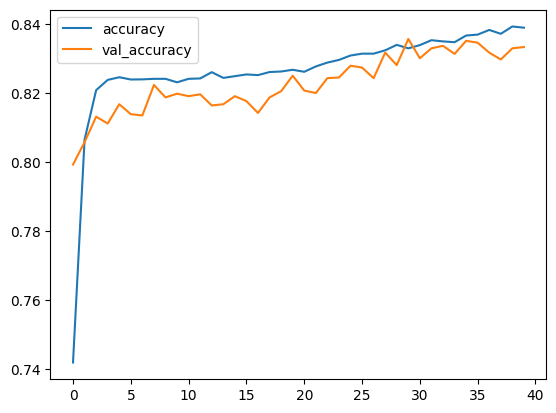

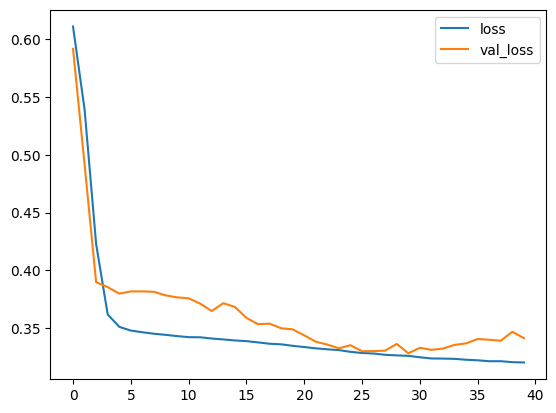

In [ ]:
# Plot Training Results

history_seq_df_5[['accuracy', 'val_accuracy']].plot()
history_seq_df_5[['loss', 'val_loss']].plot()

dari model sequential diatas, saya memberikan 3 *hidden layer* dengan masing masing kedalaman `8`, `4` dan `2` serta activation dengan `selu` di ketiga *hidden layer*-nya. output-nya saya berikan kedalaman `1` dengan activation `sigmoid`, hal ini saya lakukan karena saya ingin membuat klasifikasi. pada saat *compile*, saya menggunakan `loss = binary_crossentropy`, `optimizer= adam`, dan `metrics=['accuracy']`. dengan pengulangan (epoch) sebanyak 40 kali, didapatkan model dengan hasil yang kurang sempurna. hal ini terlihat karena pada grafik *history accuracy and loss* sudah tergolong baik dengan hasil `loss` dan `val loss` yang sudah cukup rendah.

### test 6


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_sequential_6 = Sequential()
model_sequential_6.add(Dense(8, activation='selu', input_shape=(39,))) # Hidden Layer 1
model_sequential_6.add(Dense(4, activation='selu')) # Hidden Layer 2
model_sequential_6.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential_6.compile(loss='binary_crossentropy',
                         optimizer='SGD',
                         metrics=['accuracy'])

model_sequential_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 320       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model

%%time
history_seq_6 = model_sequential_6.fit(train_dataset,
                                   epochs=40,
                                   validation_data=val_dataset)

Epoch 1/40
203/203 [==============================] - 2s 6ms/step - loss: 0.7349 - accuracy: 0.4738 - val_loss: 0.6948 - val_accuracy: 0.5316
Epoch 2/40
203/203 [==============================] - 1s 3ms/step - loss: 0.6827 - accuracy: 0.5626 - val_loss: 0.6800 - val_accuracy: 0.5812
Epoch 3/40
203/203 [==============================] - 1s 3ms/step - loss: 0.6686 - accuracy: 0.6026 - val_loss: 0.6739 - val_accuracy: 0.6152
Epoch 4/40
203/203 [==============================] - 1s 3ms/step - loss: 0.6582 - accuracy: 0.6296 - val_loss: 0.6699 - val_accuracy: 0.6369
Epoch 5/40
203/203 [==============================] - 1s 3ms/step - loss: 0.6496 - accuracy: 0.6511 - val_loss: 0.6662 - val_accuracy: 0.6553
Epoch 6/40
203/203 [==============================] - 1s 3ms/step - loss: 0.6426 - accuracy: 0.6709 - val_loss: 0.6615 - val_accuracy: 0.6727
Epoch 7/40
203/203 [==============================] - 1s 3ms/step - loss: 0.6361 - accuracy: 0.6879 - val_loss: 0.6546 - val_accuracy: 0.6913
Epoch 

In [ ]:
# Create DataFrame

history_seq_df_6 = pd.DataFrame(history_seq_6.history)

<Axes: >

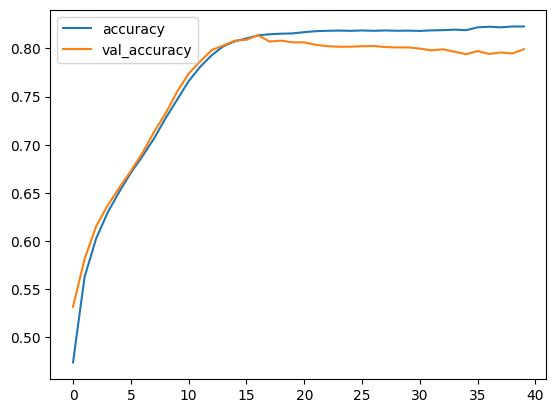

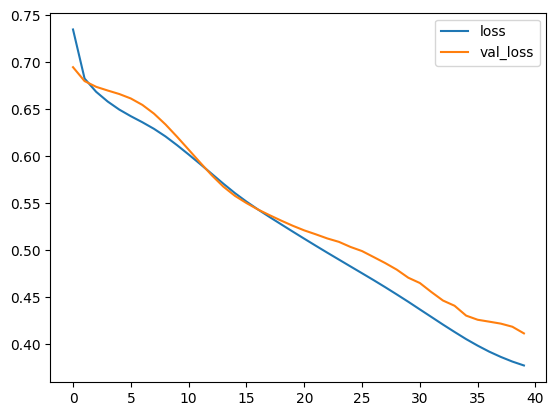

In [ ]:
# Plot Training Results

history_seq_df_6[['accuracy', 'val_accuracy']].plot()
history_seq_df_6[['loss', 'val_loss']].plot()

dari model sequential diatas, saya memberikan 2 *hidden layer* dengan masing masing kedalaman `8`, dan `4` serta activation dengan `selu` di kedua *hidden layer*-nya. output-nya saya berikan kedalaman `1` dengan activation `sigmoid`, hal ini saya lakukan karena saya ingin membuat klasifikasi. pada saat *compile*, saya menggunakan `loss = binary_crossentropy`, `optimizer= SGD`, dan `metrics=['accuracy']`. dengan pengulangan (epoch) sebanyak 40 kali, didapatkan model dengan hasil yang kurang sempurna. hal ini terlihat karena pada grafik *history accuracy and loss* sudah tergolong baik tetapi hasil `loss` dan `val loss` nya masih tergolong tinggi.

### test 7

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_sequential_7 = Sequential()
model_sequential_7.add(Dense(32, activation='relu', input_shape=(39,))) # Hidden Layer 1
model_sequential_7.add(Dense(16, activation='relu')) # Hidden Layer 2
model_sequential_7.add(Dense(8, activation='relu')) # Hidden Layer 3
model_sequential_7.add(Dense(4, activation='relu')) # Hidden Layer 4
model_sequential_7.add(Dense(1, activation='sigmoid')) # Output Layer

# Compile
model_sequential_7.compile(loss='binary_crossentropy',
                         optimizer='SGD',
                         metrics=['accuracy'])

model_sequential_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1280      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the Model

%%time
history_seq_7 = model_sequential_7.fit(train_dataset,
                                   epochs=40,
                                   validation_data=val_dataset)

Epoch 1/40
203/203 [==============================] - 3s 7ms/step - loss: 0.6944 - accuracy: 0.5421 - val_loss: 0.6921 - val_accuracy: 0.5295
Epoch 2/40
203/203 [==============================] - 1s 3ms/step - loss: 0.6896 - accuracy: 0.5424 - val_loss: 0.6902 - val_accuracy: 0.5327
Epoch 3/40
203/203 [==============================] - 1s 3ms/step - loss: 0.6874 - accuracy: 0.5428 - val_loss: 0.6882 - val_accuracy: 0.5356
Epoch 4/40
203/203 [==============================] - 1s 3ms/step - loss: 0.6845 - accuracy: 0.5436 - val_loss: 0.6854 - val_accuracy: 0.5408
Epoch 5/40
203/203 [==============================] - 1s 3ms/step - loss: 0.6802 - accuracy: 0.5528 - val_loss: 0.6811 - val_accuracy: 0.5581
Epoch 6/40
203/203 [==============================] - 1s 3ms/step - loss: 0.6732 - accuracy: 0.5808 - val_loss: 0.6751 - val_accuracy: 0.5942
Epoch 7/40
203/203 [==============================] - 1s 3ms/step - loss: 0.6627 - accuracy: 0.6212 - val_loss: 0.6661 - val_accuracy: 0.6412
Epoch 

In [ ]:
# Create DataFrame

history_seq_df_7 = pd.DataFrame(history_seq_7.history)

<Axes: >

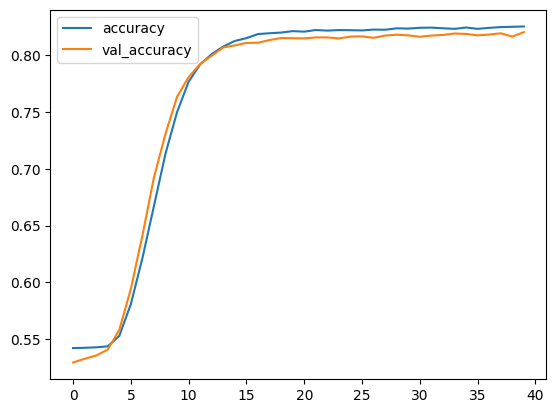

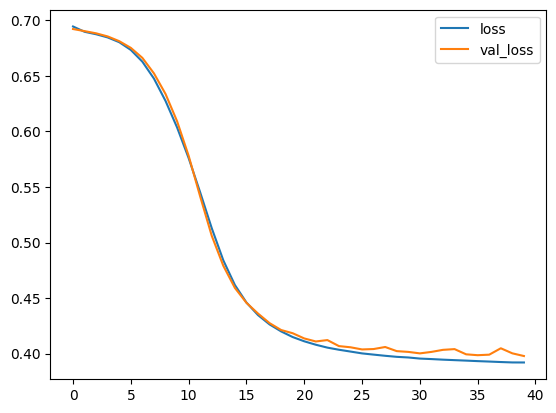

In [ ]:
# Plot Training Results

history_seq_df_7[['accuracy', 'val_accuracy']].plot()
history_seq_df_7[['loss', 'val_loss']].plot()

dari model sequential diatas, saya memberikan 4 *hidden layer* dengan masing masing kedalaman `32`, `16`, `8`, dan `4` serta activation dengan `relu` di keempat *hidden layer*-nya. output-nya saya berikan kedalaman `1` dengan activation `sigmoid`, hal ini saya lakukan karena saya ingin membuat klasifikasi. pada saat *compile*, saya menggunakan `loss = binary_crossentropy`, `optimizer= adamax`, dan `metrics=['accuracy']`. dengan pengulangan (epoch) sebanyak 40 kali, didapatkan model dengan hasil yang kurang sempurna. hal ini terlihat karena pada grafik *history accuracy and loss* sudah tergolong baik tetapi hasil `loss` dan `val loss` nya masih tergolong tinggi.

## Functional API

### test 1

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# Create Functional Model

input_layer = Input(shape=(39,))
hidden_layer_1 = Dense(64, activation='relu')(input_layer)
hidden_layer_2 = Dense(32, activation='relu')(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 39)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           2560        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           2080        ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 71)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

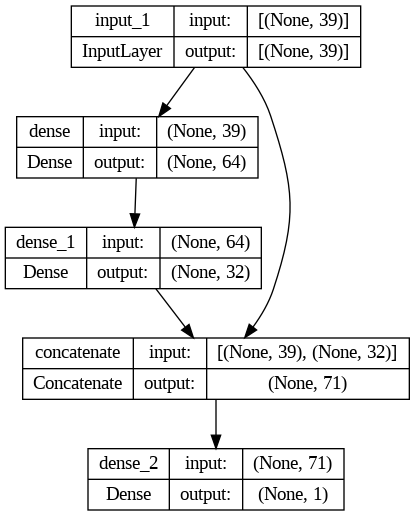

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

In [ ]:
# Train the Model

%%time
history_func = model_functional.fit(train_dataset,
                                    epochs=40,
                                    validation_data=val_dataset)

Epoch 1/40
203/203 [==============================] - 3s 5ms/step - loss: 0.6302 - accuracy: 0.6898 - val_loss: 0.6068 - val_accuracy: 0.7546
Epoch 2/40
203/203 [==============================] - 1s 4ms/step - loss: 0.5215 - accuracy: 0.7848 - val_loss: 0.4779 - val_accuracy: 0.7951
Epoch 3/40
203/203 [==============================] - 1s 4ms/step - loss: 0.3891 - accuracy: 0.8232 - val_loss: 0.4555 - val_accuracy: 0.7964
Epoch 4/40
203/203 [==============================] - 1s 4ms/step - loss: 0.3585 - accuracy: 0.8278 - val_loss: 0.4199 - val_accuracy: 0.8005
Epoch 5/40
203/203 [==============================] - 1s 4ms/step - loss: 0.3497 - accuracy: 0.8285 - val_loss: 0.3957 - val_accuracy: 0.8068
Epoch 6/40
203/203 [==============================] - 1s 4ms/step - loss: 0.3437 - accuracy: 0.8312 - val_loss: 0.3862 - val_accuracy: 0.8081
Epoch 7/40
203/203 [==============================] - 1s 3ms/step - loss: 0.3404 - accuracy: 0.8312 - val_loss: 0.3668 - val_accuracy: 0.8135
Epoch 

In [ ]:
# Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.630218,0.689774,0.606766,0.754550
1,0.521549,0.784815,0.477910,0.795098
2,0.389140,0.823164,0.455538,0.796360
3,0.358534,0.827837,0.419880,0.800505
4,0.349735,0.828454,0.395709,0.806812
5,0.343678,0.831158,0.386164,0.808074
6,0.340406,0.831235,0.366780,0.813480
7,0.335629,0.831621,0.359249,0.815102
8,0.330945,0.835831,0.352091,0.817805
9,0.326307,0.836564,0.339303,0.820869


<Axes: >

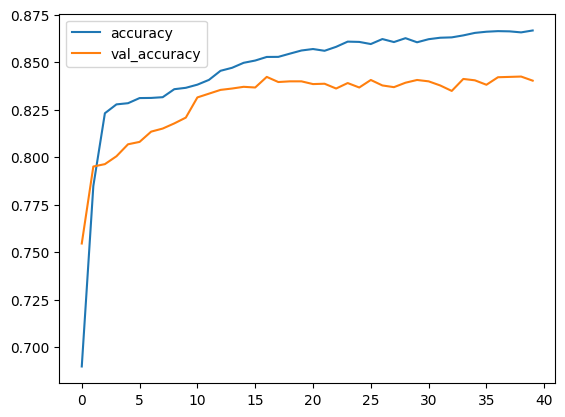

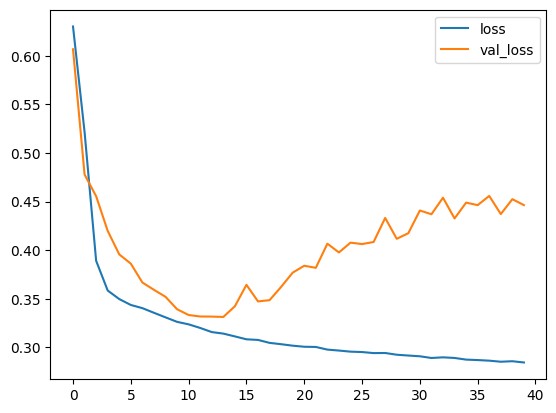

In [ ]:
# Plot Training Results

history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

dari model functional diatas, saya memberikan 2 *hidden layer* dengan masing masing kedalaman `64` dan `32` serta activation dengan `relu` di kedua *hidden layer*-nya. setelah itu pada *hidden layer* kedua, saya gabungkan dengan input layer yang nantinya akan diproses kembali. output-nya saya berikan kedalaman `1` dengan activation `sigmoid`, hal ini saya lakukan karena saya ingin membuat klasifikasi. pada saat *compile*, saya menggunakan `loss = binary_crossentropy`, `optimizer= adam`, dan `metrics=['accuracy']`. dengan pengulangan (epoch) sebanyak 40 kali, didapatkan model dengan hasil yang kurang sempurna. hal ini terlihat karena pada grafik *history accuracy and loss* masih tergolong overfit.

### test 2


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# Create Functional Model

input_layer = Input(shape=(39,))
hidden_layer_1 = Dense(8, activation='relu')(input_layer)
hidden_layer_2 = Dense(4, activation='relu')(hidden_layer_1)

hidden_layer_3 = Dense(4, activation='relu')(input_layer)
hidden_layer_4 = Dense(2, activation='relu')(hidden_layer_3)

concat_layer = concatenate([hidden_layer_4, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional_9 = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional_9.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional_9.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 39)]         0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 4)            160         ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 8)            320         ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 2)            10          ['dense_2[0][0]']                
                                                                                              

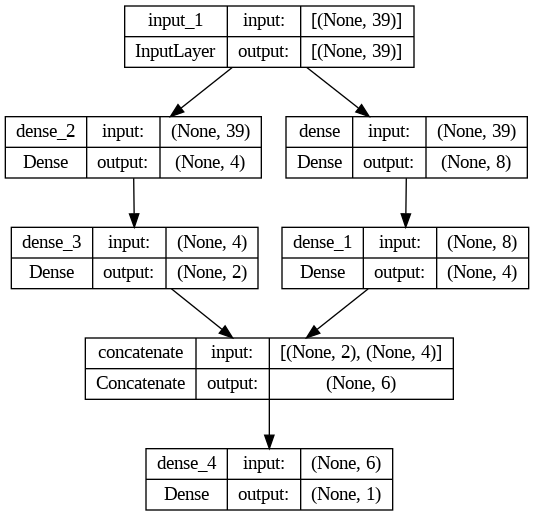

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_functional_9, show_shapes=True)

In [ ]:
# Train the Model

%%time
history_func_9 = model_functional_9.fit(train_dataset,
                                    epochs=40,
                                    validation_data=val_dataset)

Epoch 1/40
203/203 [==============================] - 3s 5ms/step - loss: 0.6696 - accuracy: 0.6057 - val_loss: 0.6748 - val_accuracy: 0.6428
Epoch 2/40
203/203 [==============================] - 1s 3ms/step - loss: 0.6328 - accuracy: 0.6997 - val_loss: 0.6481 - val_accuracy: 0.7326
Epoch 3/40
203/203 [==============================] - 1s 4ms/step - loss: 0.6016 - accuracy: 0.7571 - val_loss: 0.6124 - val_accuracy: 0.7661
Epoch 4/40
203/203 [==============================] - 2s 9ms/step - loss: 0.5665 - accuracy: 0.7778 - val_loss: 0.5628 - val_accuracy: 0.7825
Epoch 5/40
203/203 [==============================] - 2s 8ms/step - loss: 0.5205 - accuracy: 0.7923 - val_loss: 0.5071 - val_accuracy: 0.7982
Epoch 6/40
203/203 [==============================] - 1s 4ms/step - loss: 0.4733 - accuracy: 0.8086 - val_loss: 0.4591 - val_accuracy: 0.8106
Epoch 7/40
203/203 [==============================] - 1s 4ms/step - loss: 0.4325 - accuracy: 0.8212 - val_loss: 0.4208 - val_accuracy: 0.8151
Epoch 

In [ ]:
# Create DataFrame

history_func_df_9 = pd.DataFrame(history_func_9.history)

<Axes: >

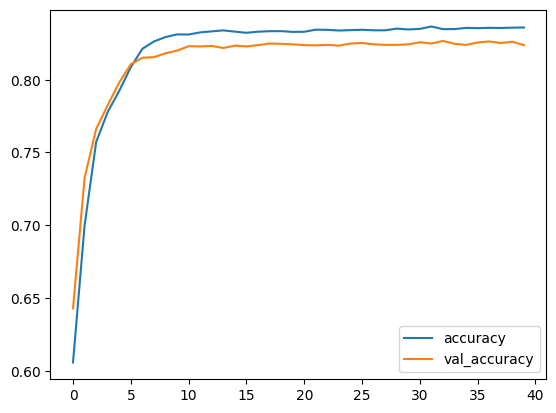

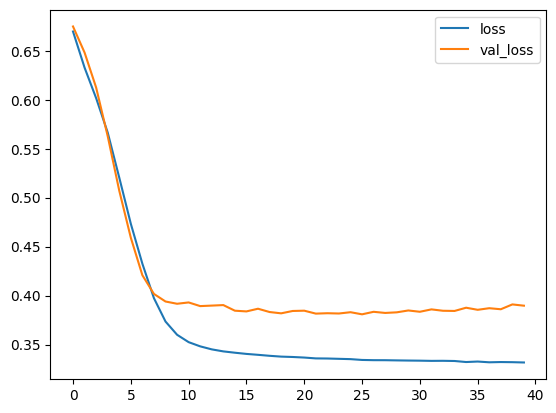

In [ ]:
# Plot Training Results

history_func_df_9[['accuracy', 'val_accuracy']].plot()
history_func_df_9[['loss', 'val_loss']].plot()

dari model functional diatas, saya memberikan 2 *hidden layer* dengan masing masing kedalaman `8` dan `4` serta activation dengan `relu` di kedua *hidden layer*-nya. setelah itu pada *hidden layer* kedua, saya gabungkan dengan pemrosesan 2 *hidden layer* lagi dengan masing-masing kedalaman `4` dan `2` serta activation dengan `relu` di kedua *hidden layer* itu pula. layer tersebut nantinya akan diproses kembali. output-nya saya berikan kedalaman `1` dengan activation `sigmoid`, hal ini saya lakukan karena saya ingin membuat klasifikasi. pada saat *compile*, saya menggunakan `loss = binary_crossentropy`, `optimizer= adam`, dan `metrics=['accuracy']`. dengan pengulangan (epoch) sebanyak 40 kali, didapatkan model dengan hasil yang kurang sempurna. hal ini terlihat karena pada grafik *history accuracy and loss* masih tergolong overfit.

### test 3, best on functional API

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# Create Functional Model

input_layer = Input(shape=(39,))
hidden_layer_1 = Dense(8, activation='relu')(input_layer)
hidden_layer_2 = Dense(4, activation='selu')(hidden_layer_1)
hidden_layer_3 = Dense(2, activation='relu')(hidden_layer_2)

hidden_layer_4 = Dense(16, activation='selu')(input_layer)
hidden_layer_5 = Dense(8, activation='relu')(hidden_layer_4)
hidden_layer_6 = Dense(4, activation='selu')(hidden_layer_5)

concat_layer = concatenate([hidden_layer_3, hidden_layer_6])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional_10 = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional_10.compile(loss='binary_crossentropy',
                         optimizer='SGD',
                         metrics='accuracy')
model_functional_10.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 39)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 8)            320         ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 16)           640         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 4)            36          ['dense[0][0]']                  
                                                                                              

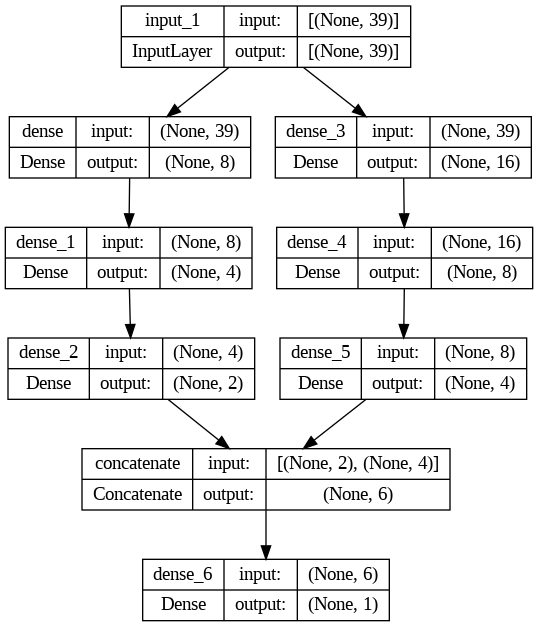

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_functional_10, show_shapes=True)

In [ ]:
# Train the Model

%%time
history_func_10 = model_functional_10.fit(train_dataset,
                                    epochs=40,
                                    validation_data=val_dataset)

Epoch 1/40
203/203 [==============================] - 3s 5ms/step - loss: 0.7067 - accuracy: 0.5345 - val_loss: 0.6839 - val_accuracy: 0.5679
Epoch 2/40
203/203 [==============================] - 1s 3ms/step - loss: 0.6720 - accuracy: 0.5899 - val_loss: 0.6687 - val_accuracy: 0.5999
Epoch 3/40
203/203 [==============================] - 1s 3ms/step - loss: 0.6573 - accuracy: 0.6181 - val_loss: 0.6599 - val_accuracy: 0.6226
Epoch 4/40
203/203 [==============================] - 1s 3ms/step - loss: 0.6470 - accuracy: 0.6407 - val_loss: 0.6524 - val_accuracy: 0.6446
Epoch 5/40
203/203 [==============================] - 1s 4ms/step - loss: 0.6382 - accuracy: 0.6617 - val_loss: 0.6453 - val_accuracy: 0.6641
Epoch 6/40
203/203 [==============================] - 1s 3ms/step - loss: 0.6299 - accuracy: 0.6822 - val_loss: 0.6375 - val_accuracy: 0.6855
Epoch 7/40
203/203 [==============================] - 1s 3ms/step - loss: 0.6214 - accuracy: 0.7042 - val_loss: 0.6286 - val_accuracy: 0.7068
Epoch 

In [ ]:
# Create DataFrame

history_func_df_10 = pd.DataFrame(history_func_10.history)

<Axes: >

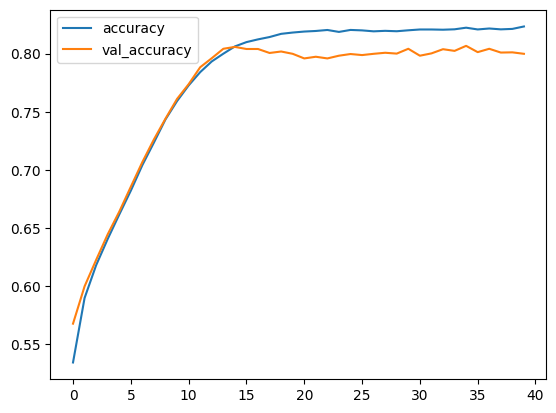

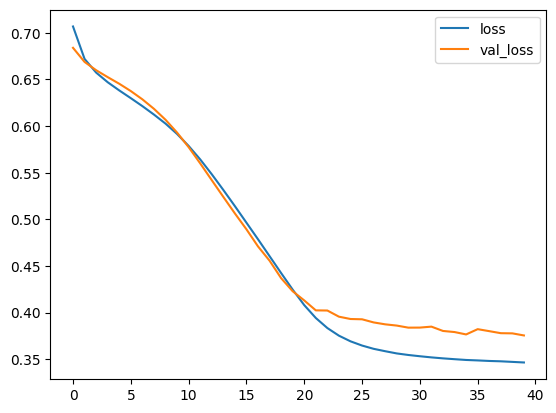

In [ ]:
# Plot Training Results

history_func_df_10[['accuracy', 'val_accuracy']].plot()
history_func_df_10[['loss', 'val_loss']].plot()

dari model functional diatas, saya memberikan 3 *hidden layer* dengan masing masing kedalaman `8`, `4`, dan `2` serta activation masing-masing `relu`, `selu`, `relu` pada *hidden layer*-nya. setelah itu pada *hidden layer* kedua, saya gabungkan dengan pemrosesan 3 *hidden layer* lagi dengan masing-masing kedalaman `16`,`8`,dan `4` serta activation masing-masing `selu`, `relu`dan `selu` di ketiga *hidden layer* itu pula. layer tersebut nantinya akan diproses kembali. output-nya saya berikan kedalaman `1` dengan activation `sigmoid`, hal ini saya lakukan karena saya ingin membuat klasifikasi. pada saat *compile*, saya menggunakan `loss = binary_crossentropy`, `optimizer= SGD`, dan `metrics=['accuracy']`. dengan pengulangan (epoch) sebanyak 40 kali, didapatkan model dengan hasil yang kurang sempurna. hal ini terlihat karena pada grafik *history accuracy and loss* masih tergolong overfit.

### test 4


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# Create Functional Model

input_layer = Input(shape=(39,))
hidden_layer_1 = Dense(8, activation='relu')(input_layer)
hidden_layer_2 = Dense(4, activation='relu')(hidden_layer_1)

hidden_layer_3 = Dense(4, activation='selu')(input_layer)
hidden_layer_4 = Dense(2, activation='selu')(hidden_layer_3)

concat_layer = concatenate([hidden_layer_4, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional_11 = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional_11.compile(loss='binary_crossentropy',
                         optimizer='SGD',
                         metrics='accuracy')
model_functional_11.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 39)]         0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 4)            160         ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 8)            320         ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 2)            10          ['dense_2[0][0]']                
                                                                                              

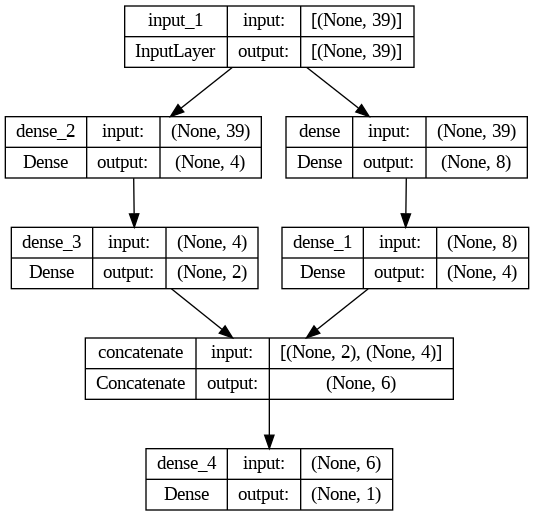

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_functional_11, show_shapes=True)

In [ ]:
# Train the Model

%%time
history_func_11 = model_functional_11.fit(train_dataset,
                                    epochs=40,
                                    validation_data=val_dataset)

Epoch 1/40
203/203 [==============================] - 2s 4ms/step - loss: 0.7236 - accuracy: 0.5126 - val_loss: 0.6888 - val_accuracy: 0.5522
Epoch 2/40
203/203 [==============================] - 1s 5ms/step - loss: 0.6728 - accuracy: 0.5908 - val_loss: 0.6644 - val_accuracy: 0.6210
Epoch 3/40
203/203 [==============================] - 1s 5ms/step - loss: 0.6511 - accuracy: 0.6452 - val_loss: 0.6508 - val_accuracy: 0.6619
Epoch 4/40
203/203 [==============================] - 1s 5ms/step - loss: 0.6367 - accuracy: 0.6860 - val_loss: 0.6400 - val_accuracy: 0.6958
Epoch 5/40
203/203 [==============================] - 1s 4ms/step - loss: 0.6254 - accuracy: 0.7140 - val_loss: 0.6307 - val_accuracy: 0.7230
Epoch 6/40
203/203 [==============================] - 1s 4ms/step - loss: 0.6159 - accuracy: 0.7375 - val_loss: 0.6225 - val_accuracy: 0.7439
Epoch 7/40
203/203 [==============================] - 1s 5ms/step - loss: 0.6078 - accuracy: 0.7540 - val_loss: 0.6152 - val_accuracy: 0.7625
Epoch 

In [ ]:
# Create DataFrame

history_func_df_11 = pd.DataFrame(history_func_11.history)

<Axes: >

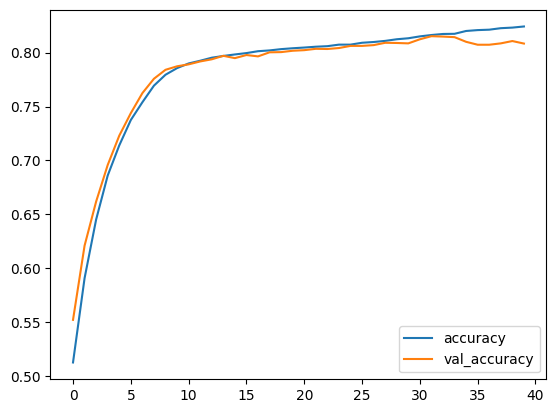

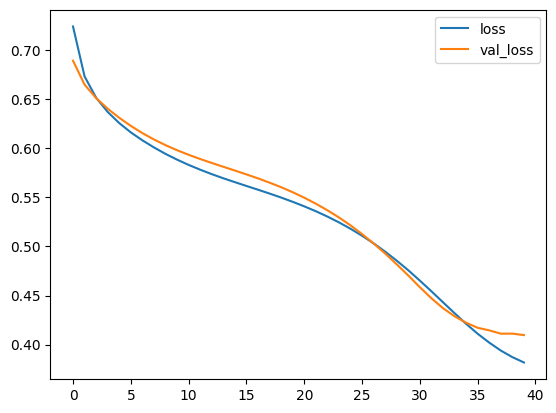

In [ ]:
# Plot Training Results

history_func_df_11[['accuracy', 'val_accuracy']].plot()
history_func_df_11[['loss', 'val_loss']].plot()

dari model functional diatas, saya memberikan 2 *hidden layer* dengan masing masing kedalaman `8`, dan `4` serta activation masing-masing `relu`, `relu` pada *hidden layer*-nya. setelah itu pada *hidden layer* kedua, saya gabungkan dengan pemrosesan 2 *hidden layer* lagi dengan masing-masing kedalaman `4` dan `2` serta activation masing-masing `selu` dan `selu` di kedua *hidden layer* itu pula. layer tersebut nantinya akan diproses kembali. output-nya saya berikan kedalaman `1` dengan activation `sigmoid`, hal ini saya lakukan karena saya ingin membuat klasifikasi. pada saat *compile*, saya menggunakan `loss = binary_crossentropy`, `optimizer= SGD`, dan `metrics=['accuracy']`. dengan pengulangan (epoch) sebanyak 40 kali, didapatkan model dengan hasil yang kurang sempurna. hal ini terlihat karena pada grafik *history accuracy and loss* sudah tergolong baik namun nilai `loss` dan `val loss` nya masih tergolong tinggi.

# 8 - Model Evaluation

disini, saya mencoba meng-evaluasi model ANN terbaik dari semua model yang telah saya coba. didapati bahwa model `Sequential API test number 5` merupakan model ANN terbaik dengan nilai `val_loss` mendekati nilai `loss` pada angka `0,34`. didapati pula nilai akurasi yang mencapai `0,83` pada data train dan data valuasi, maka saya berpendapat bahwa model ini termasuk goodfit dengan nilai terbaik.


model terbaik selanjutnya di cek pada data test untuk diuji nilai evaluasinya.

In [ ]:
# Model Evaluation of test-set

y_pred_seq = model_sequential_5.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

174/174 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      2547
           1       0.81      0.91      0.85      3002

    accuracy                           0.83      5549
   macro avg       0.84      0.82      0.83      5549
weighted avg       0.84      0.83      0.83      5549



jadi, model terbaik kita dapat menentukan bahwa ia mampu memprediksi 81% yang `churn` dan memang benar konsumen tersebut `churn`.

# 9 - Model Saving

Disini saya akan menyimpan beberapa file yang diperlukan untuk inferencing pada *deployment* di `hugginface`.

In [ ]:
# Save Pipeline

with open('final_pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

with open('num_skew.txt', 'w') as file_2:
  json.dump(num_skew, file_2)

with open('num_norm.txt', 'w') as file_3:
  json.dump(num_norm, file_3)

with open('cat_columns.txt', 'w') as file_4:
  json.dump(cat_columns, file_4)


In [ ]:
model_sequential_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 320       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Freeze Model

model_sequential_5.trainable = False
model_sequential_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 320       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 369
Trainable params: 0
Non-trainable params: 369
_________________________________________________________________


In [ ]:
# Save ANN Model

model_sequential_5.save('churn.h5')

dari data model yang disimpan, terlihat terdapat 3 hidden layer dengan Total params mencapai 369 buah. model ANN diatas kemudian disimpan dengan nama `churn.h5`.

# 11 - Pengambilan Kesimpulan

## Model Analysis

jadi, pada beberapa model yang saya uji. model `ANN Sequential API number 5` ialah model terbaik dengan melihat nilai akurasi yang tinggi dan tidak berbeda jauh dengan akurasi validasi, serta loss yang paling rendah dan tidak berbeda jauh dengan nilai loss validasi. model dilakukan secara sequential, pada awalnya, ke 39 *features* itu dimasukkan kedalam *hidden layer* pertama dengan kedalaman 8. dilanjutkan berakar kedalam *hidden layer* ke 2 dengan total kedalaman 4. setelah itu, model akan berakar kembali ke *hidden layer* ke 3 dengan kedalaman 2. di ketiga hidden layer tersebut, diaktivasi dengan cara `selu`. kemudian, saya coba compile dengan menggunakan `loss = binary_crossentropy`, `optimizer= adam`, dan `metrics=['accuracy']`. dengan pengulangan (epoch) sebanyak 40 kali, didapatkan model dengan hasil terbaik diantara lainnya. didapati nilai akurasi sebesar 0,84 dan nilai loss di angka 0,33. saran yang perlu diperbaiki kedepannya dalam memperbaiki model ialah, dengan lebih meng-eksplor model lebih jauh lagi dan penambahan `Batch Normalization` juga dapat dipertimbangkan pada perbaikan kedepannya.

## Overall Analysis

dari dataset perusahaan, terlihat bahwa terdapat 22 kolom dengan 37010 baris data di dalam dataset yang perusahaan berikan. ditemukan bahwa data yang didapat ada beberapa data yang kosong sehingga perlu dilakukan imputasi. perlu diingat bahwa dengan dilakukannya metode imputasi pada data yang hilang, ini akan membuat data menjadi semakin bias dikarenakan datanya sudah tidak berada pada *original form*-nya. dengan melihat beberapa korelasi pada beberapa data terhadap nilai `churn` nya, maka dilakukan penghilangan beberapa *features* pada data yang memiliki tingkat keterkaitan yang rendah. dataset yang diberikan oleh perusahaan masih tergolong baik dalam hal keseimbangan data `churn`-nya, sehingga tidak perlu dilakukan oversampling maupun undersampling pada data.terlihat beberapa data yang persebaran datanya tidak normal, sehingga kita perlu melakukan normalisasi pada dataset tersebut. normalisasi persebaran data yang tidak normal, akan membuat data menjadi semakin bias. terdapat pula beberapa data yang berganda sehingga kita perlu menghapusnya. data dilakukan split menjadi 3 bagian, yaitu data `train`, `val` dan `test` dengan output yang diberikan berupa data `churn`. data dilakukan *encoding* dan *scaling* kemudian digabungkan kembali menjadi data yang telah ter-normalisasi sehingga data dapat dilatih dengan model ANN. data tersebut kemudian dilatih dengan 2 model ANN, yaitu sequential dan functional. dilakukan beberapa percobaan pada model sampai didapatkan model terbaik. dan selanjutnya model akan mencoba memprediksi data test yang telah disediakan. model terbaik diatas dapat menentukan bahwa ia mampu memprediksi konsumen akan `churn` dan memang benar konsumen tersebut `churn` dengan ketepatan `81%`.